In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import csv
import io

In [6]:
df = pd.read_csv("iris-flower-dataset.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
X = df.drop("species", axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y = df["species"]
y.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
grouped_df = df.groupby('species')

<h1>Bar Plot</h1>

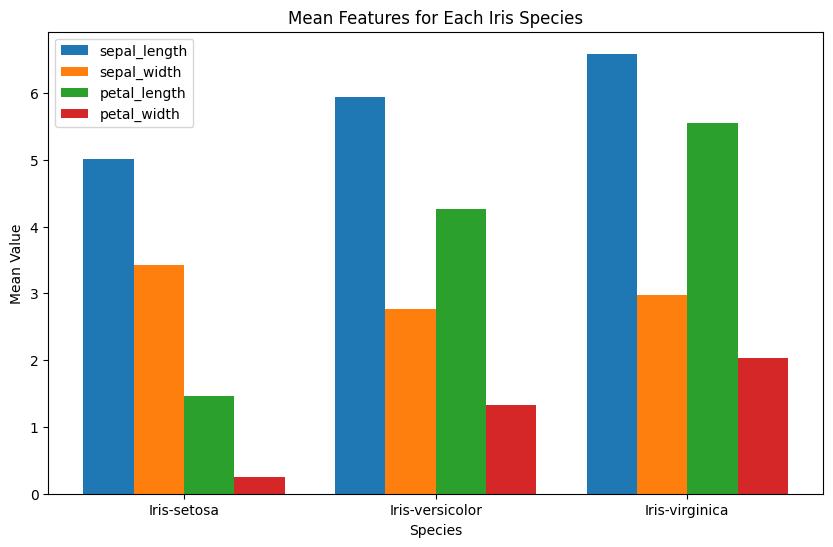

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define the features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Calculate the mean values for each feature and species
means = [grouped_df[feature].mean().values for feature in features]

# Create a clustered bar plot
bar_width = 0.2
x = np.arange(len(grouped_df.groups.keys()))

for i, mean in enumerate(means):
    ax.bar(x + i * bar_width, mean, bar_width, label=features[i])

# Set the title and labels
ax.set_title('Mean Features for Each Iris Species')
ax.set_xlabel('Species')
ax.set_ylabel('Mean Value')

# Set the x-axis tick labels
ax.set_xticks(x + 1.5 * bar_width)
ax.set_xticklabels(grouped_df.groups.keys())

# Add a legend
ax.legend()

# Show the plot
plt.show()

<h1>Box Plot</h1>

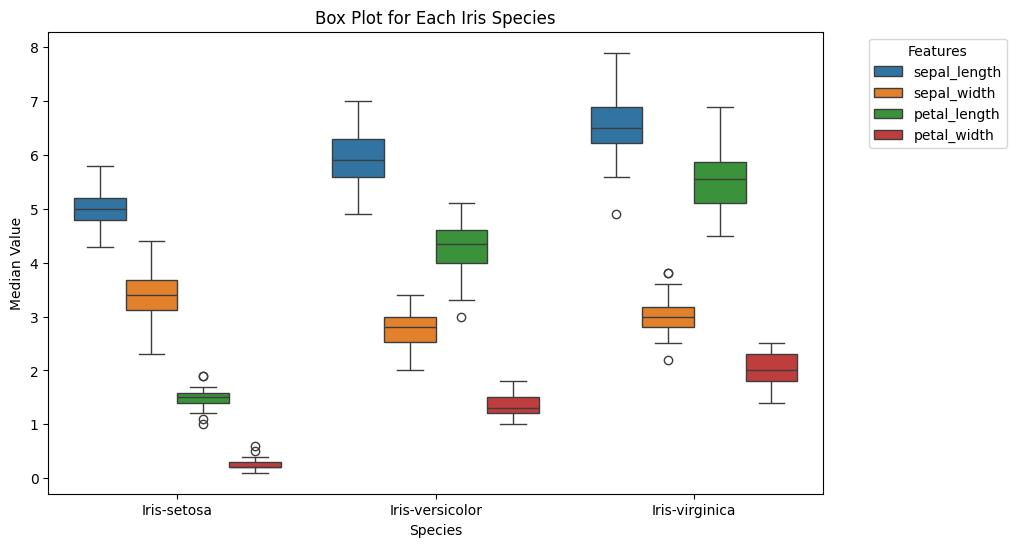

In [11]:
# Melt the dataframe to prepare for box plotting
melted_df = pd.melt(df, id_vars='species', value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Create a box plot for each species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='value', hue='variable', data=melted_df)
plt.title('Box Plot for Each Iris Species')
plt.xlabel('Species')
plt.ylabel('Median Value')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

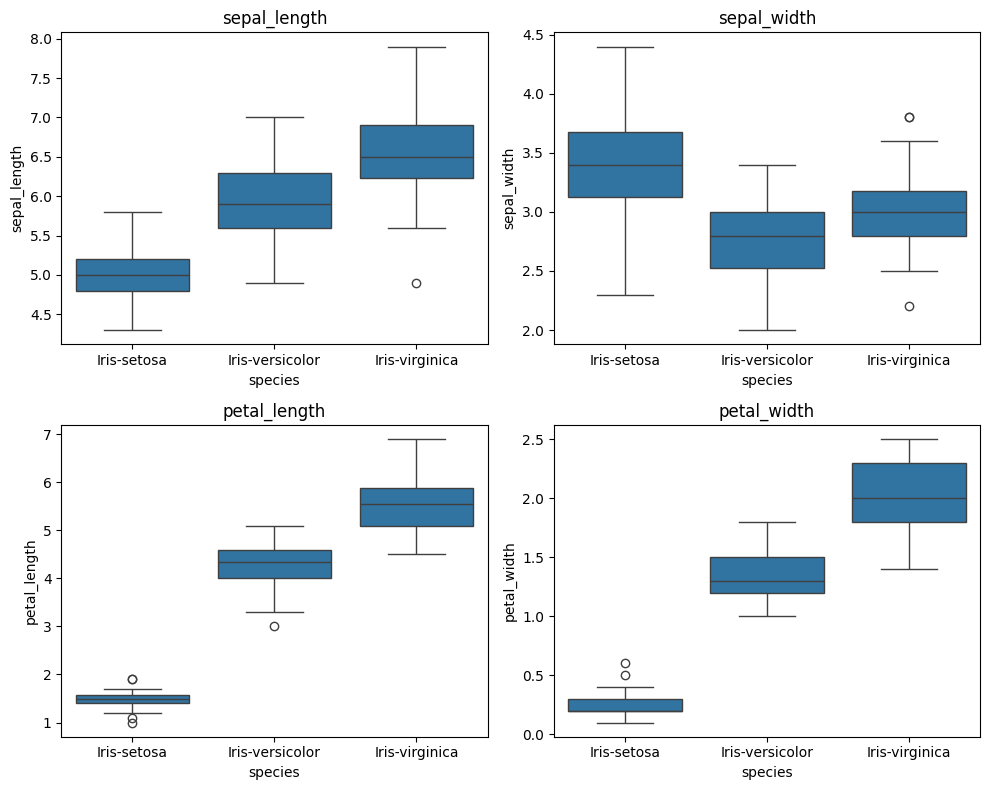

In [13]:
# Create a box plot for each feature
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    sns.boxplot(x='species', y=feature, data=df, ax=axs[i])
    axs[i].set_title(feature)

plt.tight_layout()
plt.show()

<h1>Scatter Plot</h1>

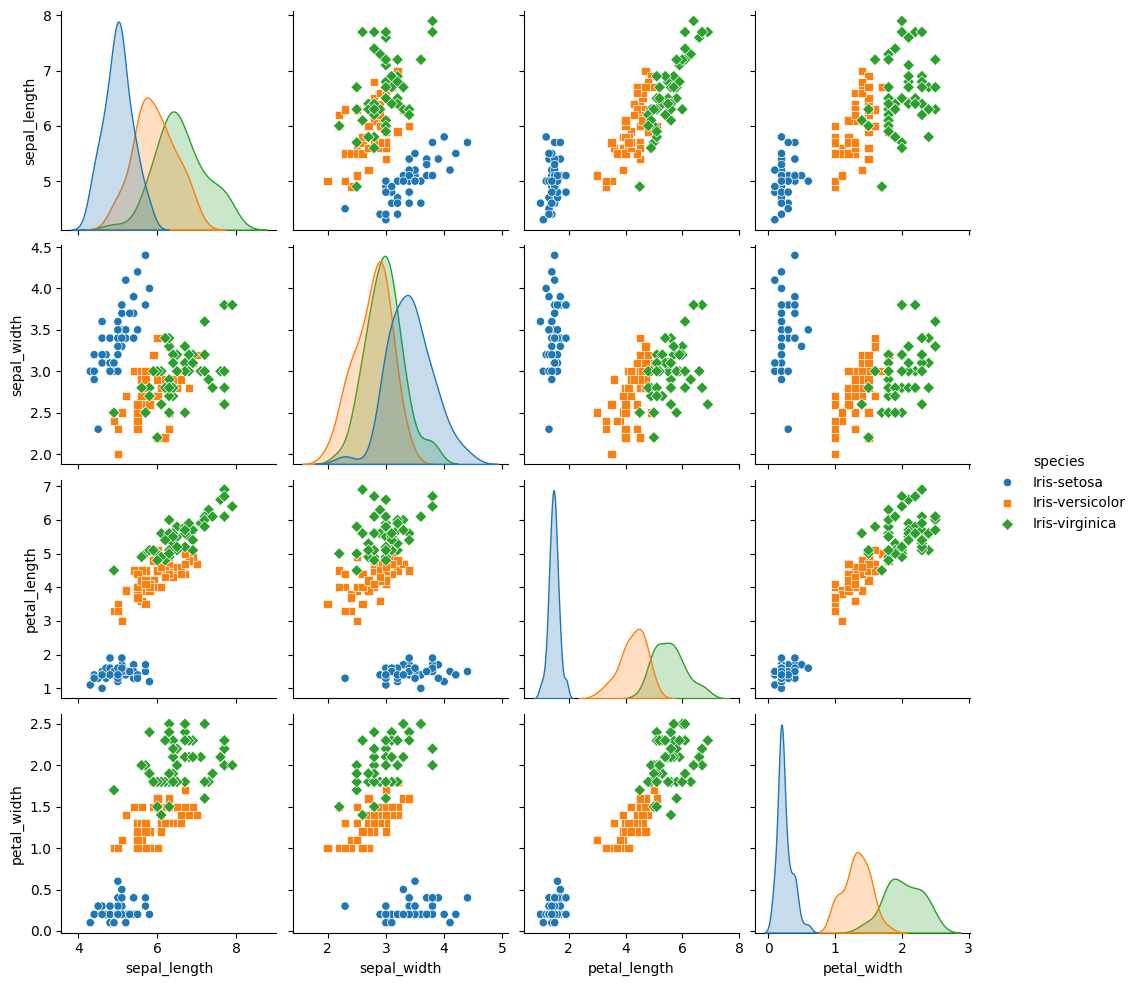

In [14]:
# Create a scatter plot matrix
sns.pairplot(df, hue="species", markers=["o", "s", "D"])

plt.show()

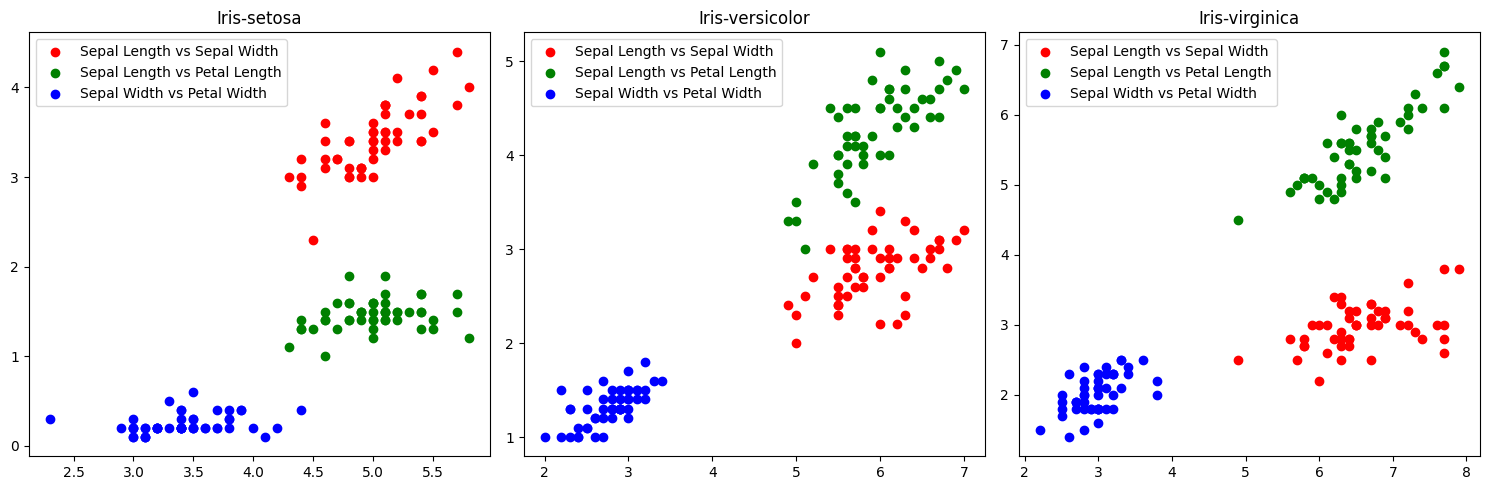

In [19]:
# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iris-setosa
axes[0].scatter(df[df['species'] == 'Iris-setosa']['sepal_length'], 
                df[df['species'] == 'Iris-setosa']['sepal_width'], 
                c='red', label='Sepal Length vs Sepal Width', marker='o')
axes[0].scatter(df[df['species'] == 'Iris-setosa']['sepal_length'], 
                df[df['species'] == 'Iris-setosa']['petal_length'], 
                c='green', label='Sepal Length vs Petal Length', marker='o')
axes[0].scatter(df[df['species'] == 'Iris-setosa']['sepal_width'], 
                df[df['species'] == 'Iris-setosa']['petal_width'], 
                c='blue', label='Sepal Width vs Petal Width', marker='o')
axes[0].set_title('Iris-setosa')
axes[0].legend()

# Iris-versicolor
axes[1].scatter(df[df['species'] == 'Iris-versicolor']['sepal_length'], 
                df[df['species'] == 'Iris-versicolor']['sepal_width'], 
                c='red', label='Sepal Length vs Sepal Width', marker='o')
axes[1].scatter(df[df['species'] == 'Iris-versicolor']['sepal_length'], 
                df[df['species'] == 'Iris-versicolor']['petal_length'], 
                c='green', label='Sepal Length vs Petal Length', marker='o')
axes[1].scatter(df[df['species'] == 'Iris-versicolor']['sepal_width'], 
                df[df['species'] == 'Iris-versicolor']['petal_width'], 
                c='blue', label='Sepal Width vs Petal Width', marker='o')
axes[1].set_title('Iris-versicolor')
axes[1].legend()

# Iris-virginica
axes[2].scatter(df[df['species'] == 'Iris-virginica']['sepal_length'], 
                df[df['species'] == 'Iris-virginica']['sepal_width'], 
                c='red', label='Sepal Length vs Sepal Width', marker='o')
axes[2].scatter(df[df['species'] == 'Iris-virginica']['sepal_length'], 
                df[df['species'] == 'Iris-virginica']['petal_length'], 
                c='green', label='Sepal Length vs Petal Length', marker='o')
axes[2].scatter(df[df['species'] == 'Iris-virginica']['sepal_width'], 
                df[df['species'] == 'Iris-virginica']['petal_width'], 
                c='blue', label='Sepal Width vs Petal Width', marker='o')
axes[2].set_title('Iris-virginica')
axes[2].legend()

plt.tight_layout()
plt.show()